In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
from IPython.display import Audio
import warnings
%matplotlib inline

import os

In [248]:
warnings.filterwarnings("ignore")

In [249]:
SR = 3000

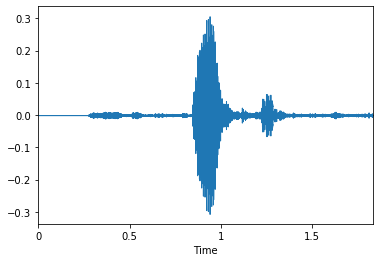

In [250]:
audio, sr = lr.load("./data/1/devi-khos-1a.wav", mono=True, sr=SR)
time = np.arange(0, len(audio)) / sr
plt.figure()
librosa.display.waveplot(audio, sr=sr)

In [251]:
Audio(audio, rate=SR)

In [252]:
labels, voices = [], []

In [253]:
try:
    label = int("a")
except:
    pass

label

4

In [254]:
for dirpath, dirnames, filenames in os.walk('./data'):
    try:
        label = int(dirpath.split("/")[-1])
    except:
        pass
    
    for filename in filenames:
        try:
            audio, sr = lr.load(os.path.join(dirpath, filename), mono=True, sr=SR)
            time = np.arange(0, len(audio)) / sr
#             plt.figure()
#             librosa.display.waveplot(audio, sr=sr)
#             plt.title(f"{filename}")
            labels.append(label)
            voices.append(audio)
        except:
            print(f"ERROR ON: {os.path.join(dirpath, filename)}")

(array([ 23.,  46., 118., 225., 127.,  93.,  37.,  16.,   2.,   1.]),
 array([ 1250. ,  2237.9,  3225.8,  4213.7,  5201.6,  6189.5,  7177.4,
         8165.3,  9153.2, 10141.1, 11129. ]),
 <a list of 10 Patch objects>)

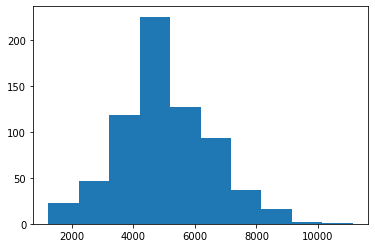

In [255]:
lengths = list(map(len, voices))
lengths.sort()
plt.hist(lengths)

In [256]:
max_length = max(lengths)
max_length

11129

In [257]:
voice = voices[220]
Audio(voice, rate=SR)

In [258]:
mfcc = librosa.feature.mfcc(voices[220], sr=SR, n_mfcc=20)
mfcc.shape

(20, 15)

In [259]:
padded_voices = voices.copy()
padded_voices = list(map(lambda v: np.pad(v, (0, max_length - len(v)), mode="constant"), padded_voices))

In [260]:
max(list(map(len, padded_voices))) == min(list(map(len, padded_voices)))

True

In [261]:
mfccs = [librosa.feature.mfcc(voice, sr=SR, n_mfcc=20) for voice in padded_voices]

In [263]:
mean_mfccs = [m.mean(axis=0) for m in mfccs]

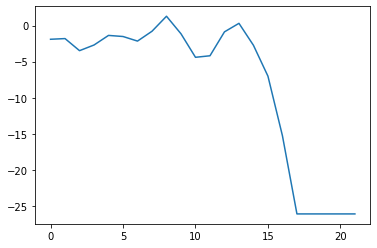

In [264]:
plt.plot(mean_mfccs[220])

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mean_mfccs, labels, train_size=0.9)
model = LogisticRegression(max_iter=1000, C=10)

In [287]:
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [288]:
model.score(X_test, y_test)

0.2753623188405797